<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/class_2_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/Telecom Customer Churn Dataset - Telecom Customer Churn Dataset.csv")
df.head()

,phoneno,age,gender,zipcode,calls,sms,mms,charges,coverage,complaint,sim,phone,prepost,churn
0,5974,1.0,Male,91107,160,25,1,490,0,4,Dual Sim,Andoid,Prepaid,No Churn
1,4535,1.0,Male,90089,150,45,19,340,0,3,Dual Sim,Andoid,Prepaid,No Churn
2,4016,1.0,Male,94720,100,39,15,110,0,1,Single Sim,Andoid,Prepaid,No Churn
3,8523,2.0,Male,94112,270,35,9,1000,0,1,Single Sim,Andoid,Prepaid,No Churn
4,5052,2.0,Female,91330,100,35,8,450,0,4,Single Sim,Andoid,Prepaid,No Churn


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phoneno    5000 non-null   int64  
 1   age        4994 non-null   float64
 2   gender     5000 non-null   object 
 3   zipcode    5000 non-null   int64  
 4   calls      5000 non-null   int64  
 5   sms        5000 non-null   int64  
 6   mms        5000 non-null   int64  
 7   charges    5000 non-null   int64  
 8   coverage   5000 non-null   int64  
 9   complaint  5000 non-null   int64  
 10  sim        5000 non-null   object 
 11  phone      5000 non-null   object 
 12  prepost    5000 non-null   object 
 13  churn      5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
df.describe(include='all')

,phoneno,age,gender,zipcode,calls,sms,mms,charges,coverage,complaint,sim,phone,prepost,churn
count,5000.000000,4994.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single Sim,Andoid,Postpaid,No Churn
freq,NaN,NaN,3530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4478,4698,2984,4520
mean,5497.188000,1.881057,NaN,93152.503000,193.793800,45.338400,20.104600,737.742000,0.719000,2.388600,NaN,NaN,NaN,NaN
std,2603.474018,0.839796,NaN,2121.852197,174.765898,11.463166,11.467954,460.337293,1.233184,1.154061,NaN,NaN,NaN,NaN
min,1000.000000,1.000000,NaN,9307.000000,0.000000,23.000000,-3.000000,80.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,3266.500000,1.000000,NaN,91911.000000,70.000000,35.000000,10.000000,390.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,5457.500000,2.000000,NaN,93437.000000,150.000000,45.000000,20.000000,640.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
75%,7779.250000,3.000000,NaN,94608.000000,250.000000,55.000000,30.000000,980.000000,2.000000,3.000000,NaN,NaN,NaN,NaN


<Axes: xlabel='age'>

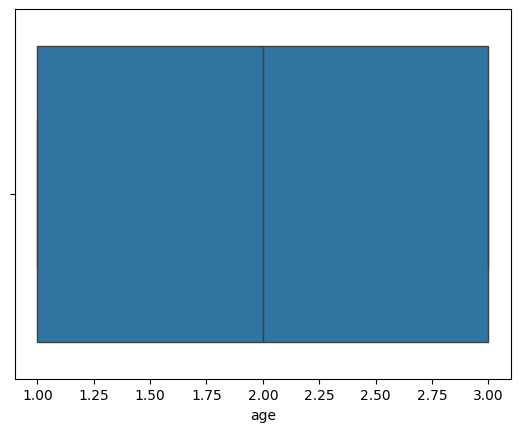

In [48]:
#box plot of age
sns.boxplot(x=df['age'])

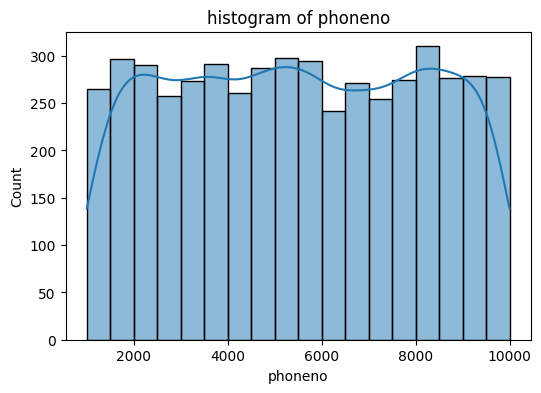

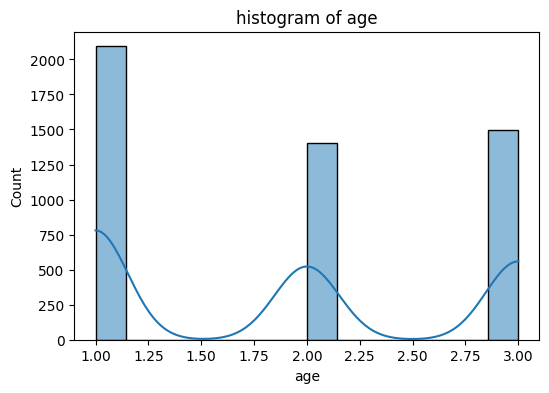

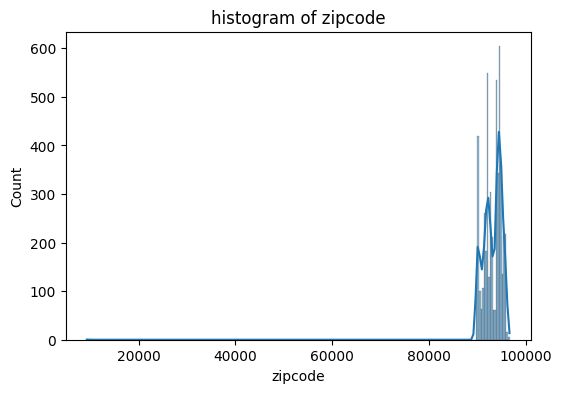

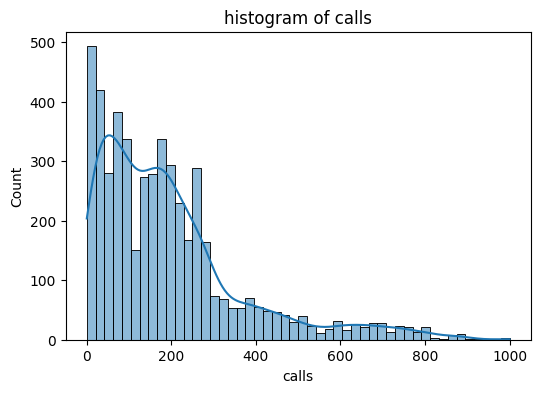

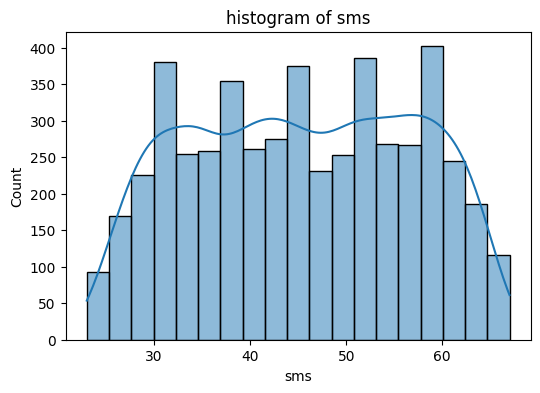

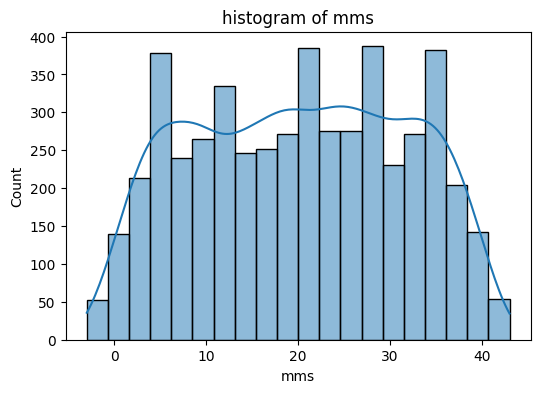

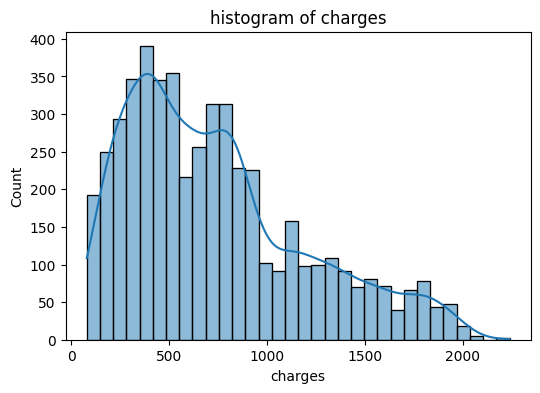

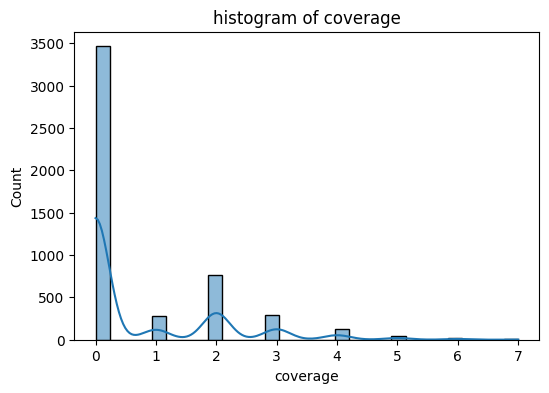

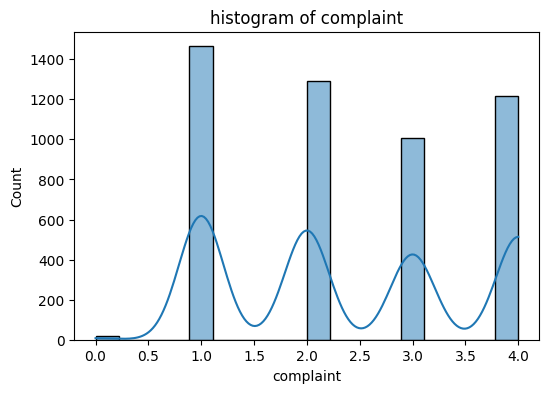

In [49]:
#histogram of all numeric cols
for cols in df.select_dtypes(include=['int64','float64']).columns:
  plt.figure(figsize=(6,4))
  plt.title(f"histogram of {cols}")
  sns.histplot(df[cols],kde=True)
  plt.show()


array([[<Axes: title={'center': 'phoneno'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'calls'}>,
        <Axes: title={'center': 'sms'}>, <Axes: title={'center': 'mms'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'complaint'}>]], dtype=object)

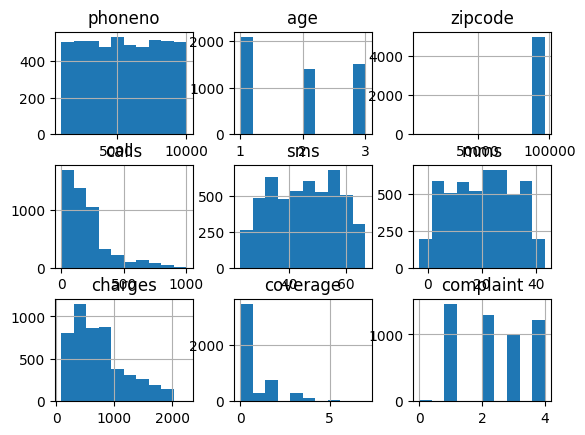

In [50]:
df.hist()

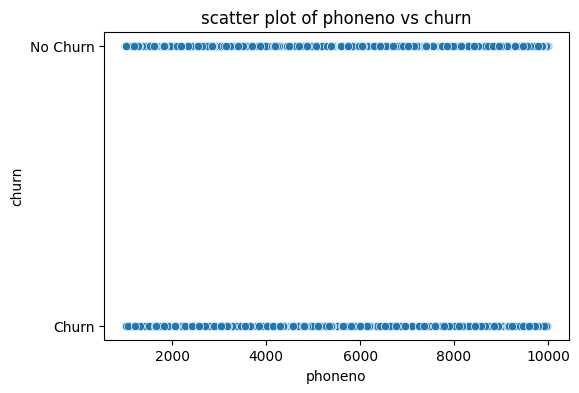

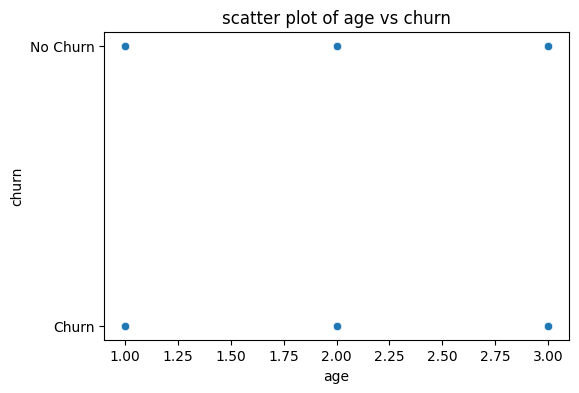

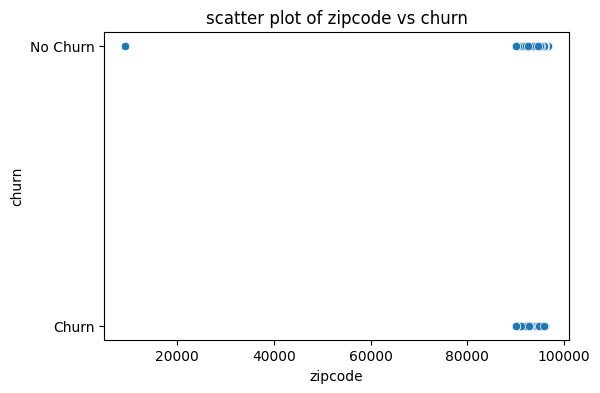

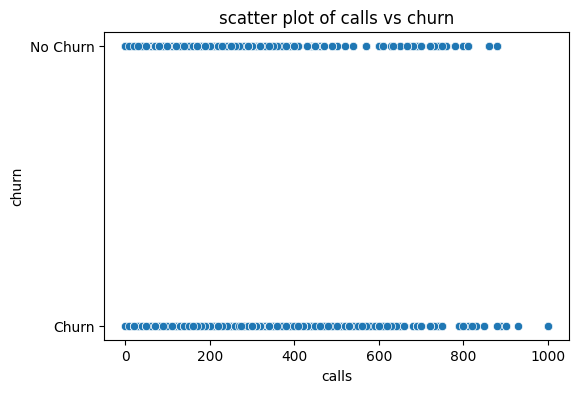

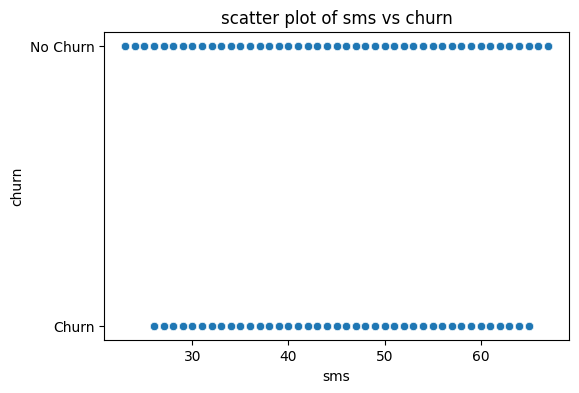

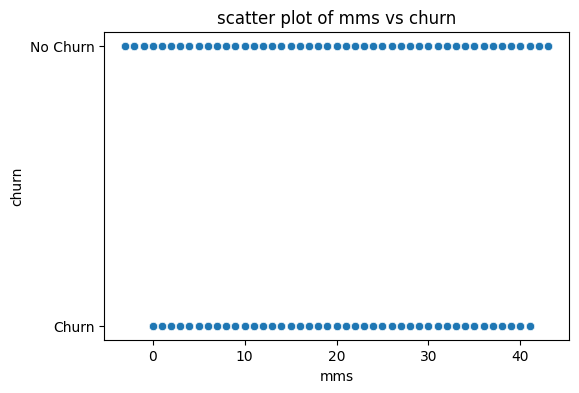

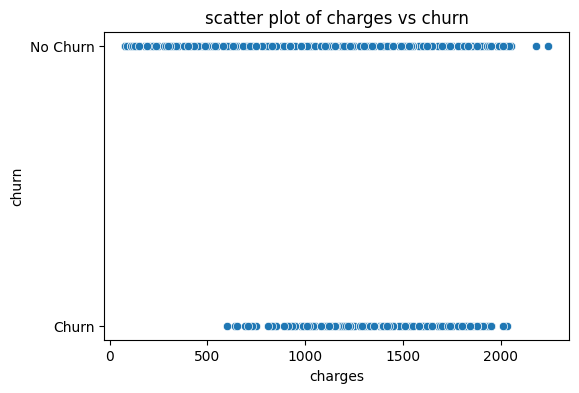

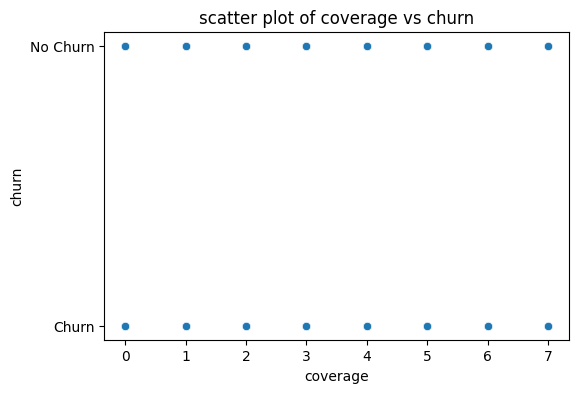

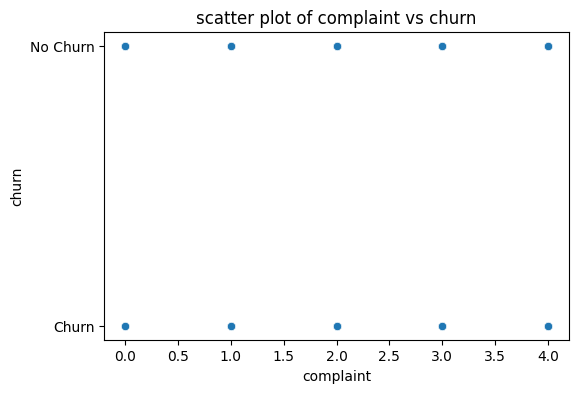

In [51]:
#histogram of all numeric cols
for cols in df.select_dtypes(include=['int64','float64']).columns:
  plt.figure(figsize=(6,4))
  plt.title(f"scatter plot of {cols} vs churn")
  sns.scatterplot(x=df[cols], y=df['churn'])
  plt.show()

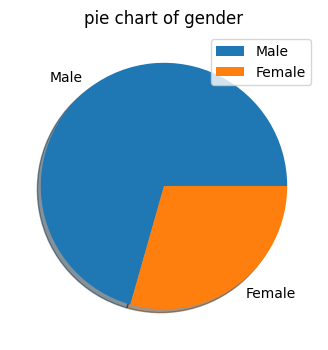

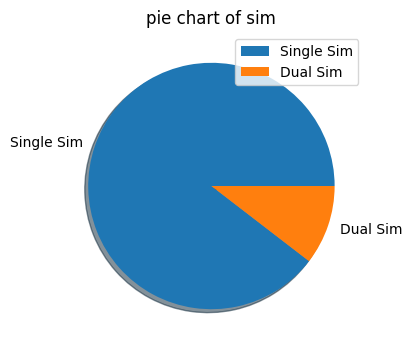

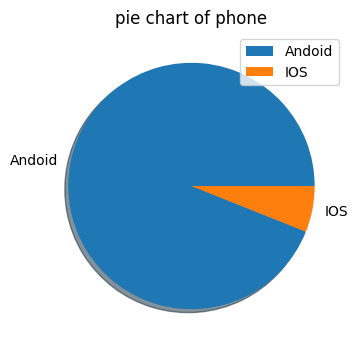

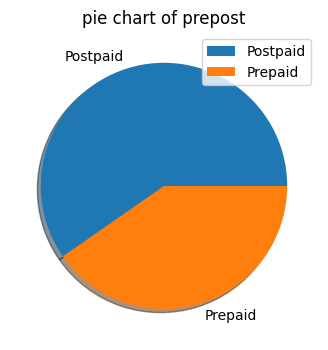

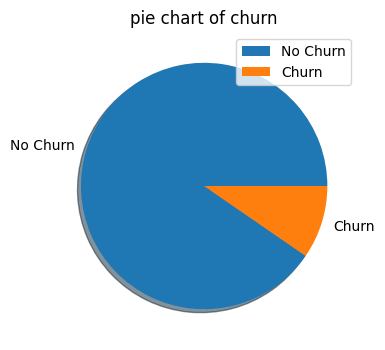

In [52]:
for cols in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(6,4))
  plt.pie(df[cols].value_counts().values,
          labels=df[cols].value_counts().index,
          shadow=True)
  plt.title(f"pie chart of {cols}")
  plt.legend()
  plt.show()

/tmp/ipython-input-883560216.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


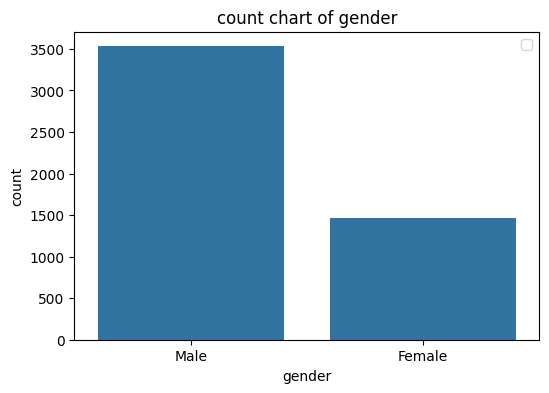

/tmp/ipython-input-883560216.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


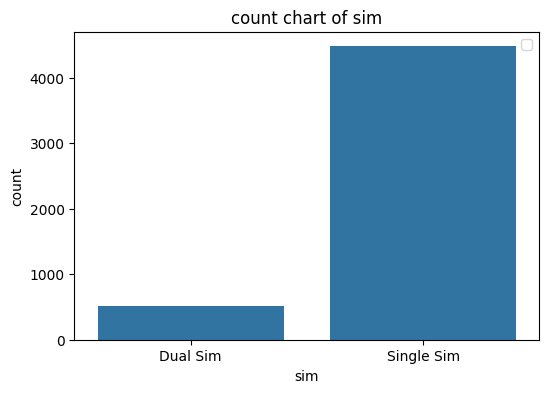

/tmp/ipython-input-883560216.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


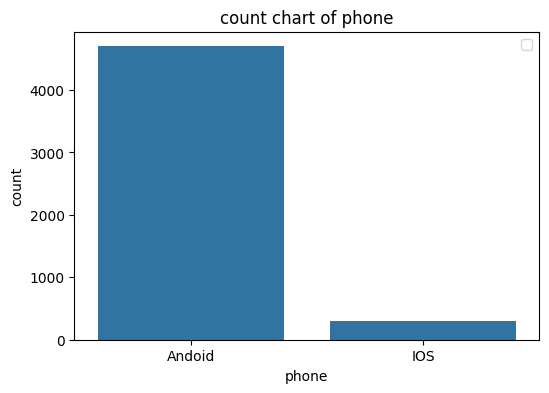

/tmp/ipython-input-883560216.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


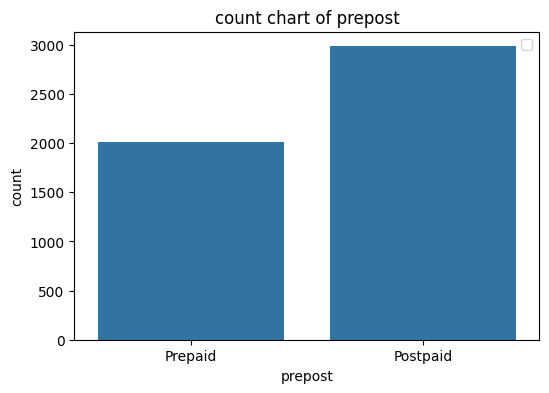

/tmp/ipython-input-883560216.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


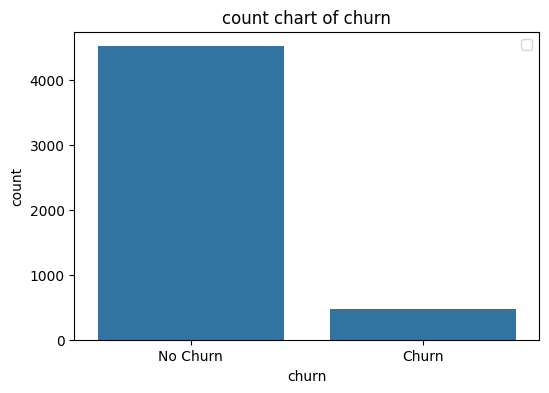

In [53]:
for cols in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(6,4))
  #show count also above bar
  sns.countplot(x=df[cols],data=df)
  plt.title(f"count chart of {cols}")
  plt.legend()
  plt.show()

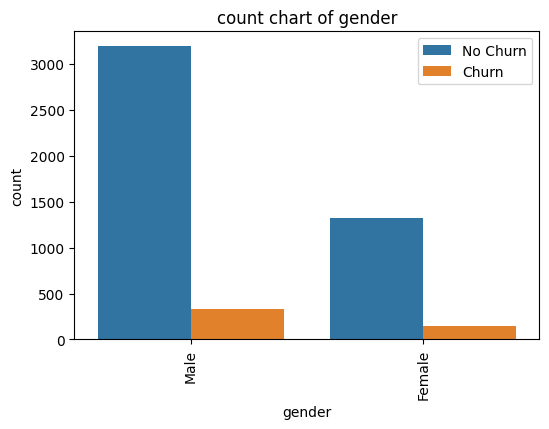

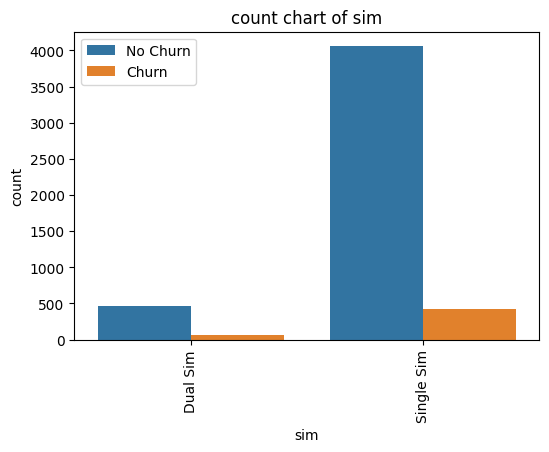

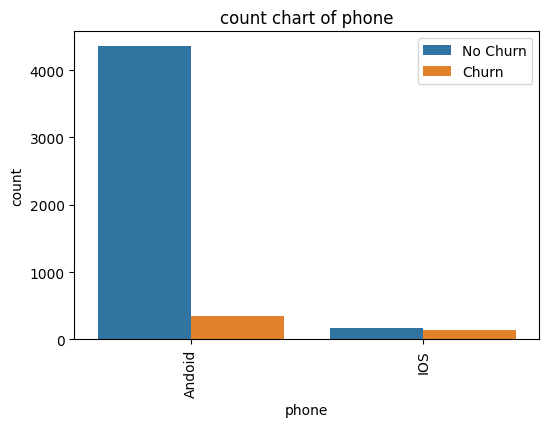

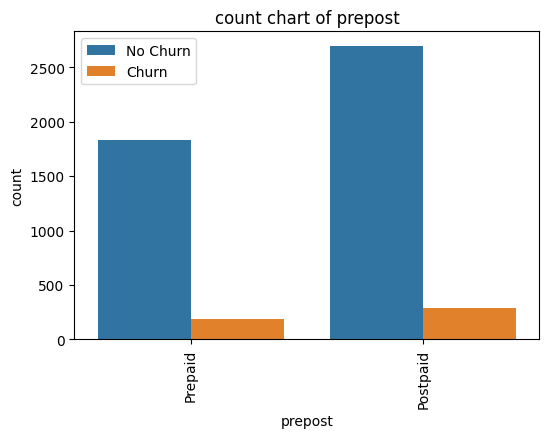

/tmp/ipython-input-1771468514.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


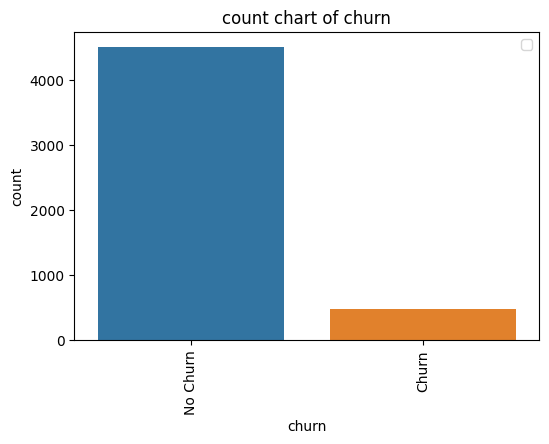

In [54]:
for cols in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(6,4))
  #show count also above bar
  sns.countplot(x=df[cols],data=df,hue=df['churn'])
  plt.xticks(rotation=90)
  plt.title(f"count chart of {cols}")
  plt.legend()
  plt.show()

In [55]:
numerical_cols = df.select_dtypes(include=['int64','float64','number']).columns
features_with_outliers = []
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  if not outliers.empty:
    features_with_outliers.append(col)

print("features_with_outliers")
print(features_with_outliers)


features_with_outliers
['zipcode', 'calls', 'charges', 'coverage']


/tmp/ipython-input-1194357099.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


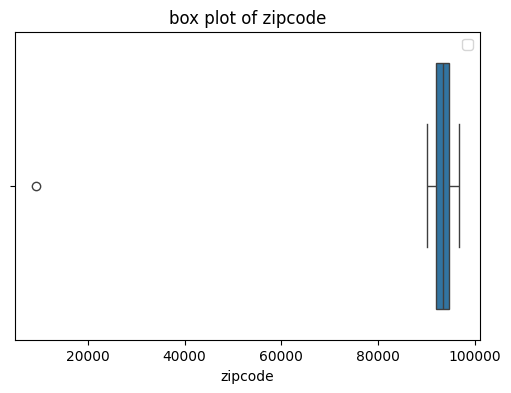

/tmp/ipython-input-1194357099.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


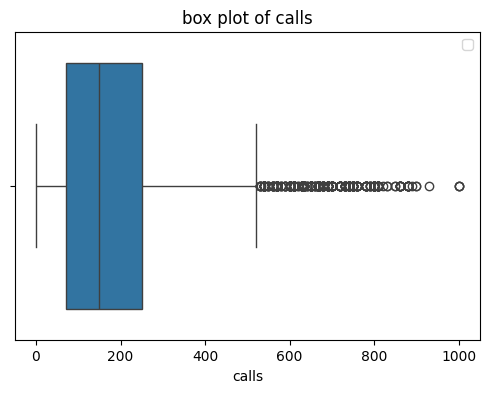

/tmp/ipython-input-1194357099.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


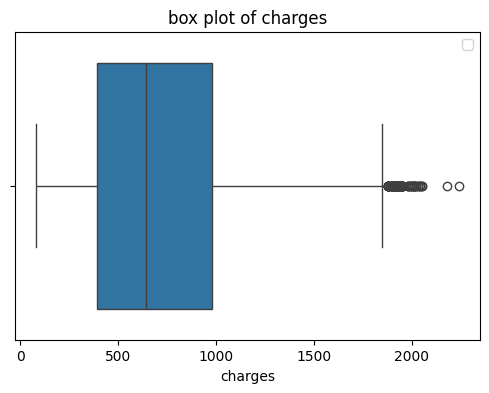

/tmp/ipython-input-1194357099.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


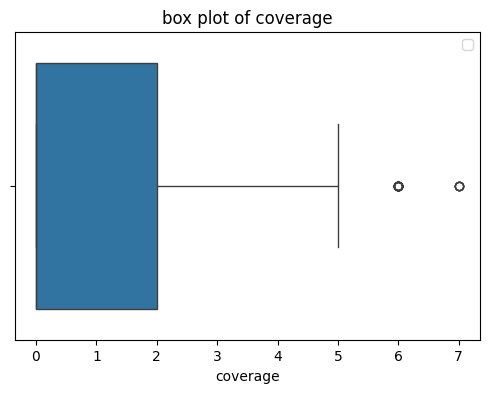

In [56]:
for cols in features_with_outliers:
  plt.figure(figsize=(6,4))
  plt.title(f"box plot of {cols}")
  sns.boxplot(x=df[cols])
  plt.legend()
  plt.show()


/tmp/ipython-input-251685455.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


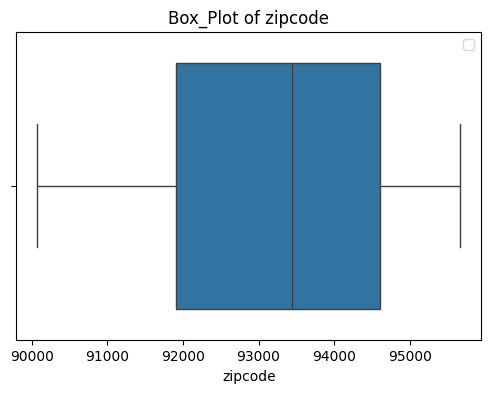

/tmp/ipython-input-251685455.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


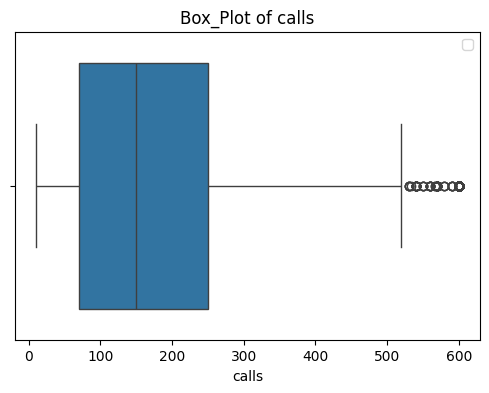

/tmp/ipython-input-251685455.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


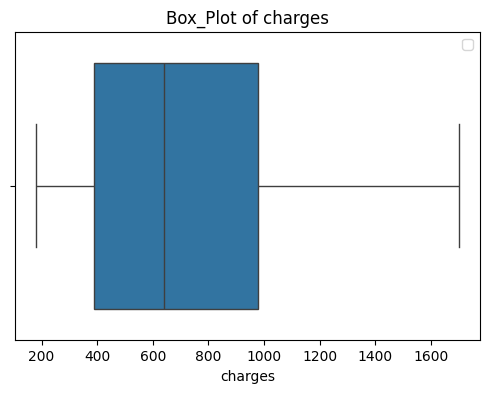

/tmp/ipython-input-251685455.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


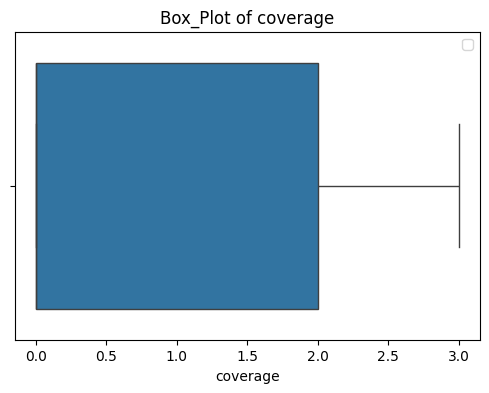

In [57]:
for cols in features_with_outliers:
  L = df[cols].quantile(0.05)
  U = df[cols].quantile(0.95)
  df[cols] = df[cols].clip(lower=L,upper=U)

for cols in features_with_outliers:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = cols,data = df)
  plt.legend()
  plt.title(f"Box_Plot of {cols}")
  plt.show()

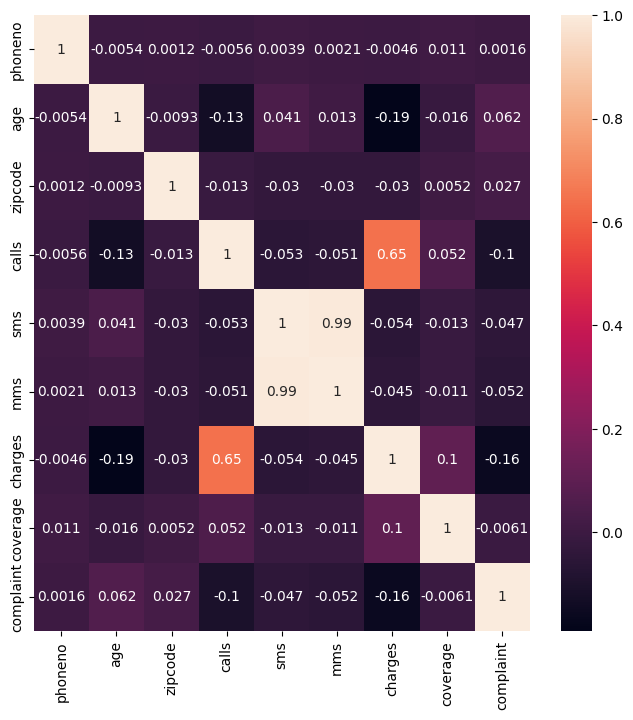

In [58]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()
#

In [59]:
df.drop(axis=1,columns=['phoneno','zipcode'],inplace=True)

In [60]:
df.churn.value_counts()

,count
churn,
No Churn,4520
Churn,480


In [61]:
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [62]:
df.isna().sum()

,0
age,0
gender,0
calls,0
sms,0
mms,0
charges,0
coverage,0
complaint,0
sim,0
phone,0


In [63]:
df['churn'] = df.apply(lambda x:1 if x['churn']=="No Churn" else 0, axis = 1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        5000 non-null   float64
 1   gender     5000 non-null   object 
 2   calls      5000 non-null   int64  
 3   sms        5000 non-null   int64  
 4   mms        5000 non-null   int64  
 5   charges    5000 non-null   int64  
 6   coverage   5000 non-null   int64  
 7   complaint  5000 non-null   int64  
 8   sim        5000 non-null   object 
 9   phone      5000 non-null   object 
 10  prepost    5000 non-null   object 
 11  churn      5000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 468.9+ KB


In [65]:
df['gender'] = df.apply(lambda x:1 if x['gender']=="Male" else 0, axis = 1)
df['sim'] = df.apply(lambda x:1 if x['sim']=="Dual Sim" else 0, axis = 1)
df['phone'] = df.apply(lambda x:1 if x['phone']=="Andoid" else 0, axis = 1)
df['prepost'] = df.apply(lambda x:1 if x['prepost']=="Prepaid" else 0, axis = 1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        5000 non-null   float64
 1   gender     5000 non-null   int64  
 2   calls      5000 non-null   int64  
 3   sms        5000 non-null   int64  
 4   mms        5000 non-null   int64  
 5   charges    5000 non-null   int64  
 6   coverage   5000 non-null   int64  
 7   complaint  5000 non-null   int64  
 8   sim        5000 non-null   int64  
 9   phone      5000 non-null   int64  
 10  prepost    5000 non-null   int64  
 11  churn      5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [67]:
#see value counts of all news
for col in  ['gender','sim','phone','prepost','churn']:
  print(f"value counts of {col}")
  print(df[col].value_counts())
  print("-"*50)


value counts of gender
gender
1    3530
0    1470
Name: count, dtype: int64
--------------------------------------------------
value counts of sim
sim
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
value counts of phone
phone
1    4698
0     302
Name: count, dtype: int64
--------------------------------------------------
value counts of prepost
prepost
0    2984
1    2016
Name: count, dtype: int64
--------------------------------------------------
value counts of churn
churn
1    4520
0     480
Name: count, dtype: int64
--------------------------------------------------


In [68]:
y = df['churn']
X = df.drop(axis=1,columns=['churn'])
#import train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



In [69]:
#z score scaling on charges and calls
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['charges','calls']] = scaler.fit_transform(X_train[['charges','calls']])
X_test[['charges','calls']] = scaler.transform(X_test[['charges','calls']])


In [70]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "lbfgs",max_iter = 1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
#confusion metrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 63,  33],
       [ 10, 894]])

In [73]:
#print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.957

In [74]:
#pickl dump
import pickle
model_pickle_file = open("churn.pkl","wb")
pickle.dump(logreg,model_pickle_file)
model_pickle_file.close()